# Mass Transports

Transport diagnostics for flow through major straits.

## Theory

Formally, mass transports are given by
$$T_x = \rho u  $$
$$T_y = \rho v  $$

Mass transports are diagnostics that are calculated online by the model:

|variable|long name|units|dimensions|
|-|
|tx_trans|T-cell i-mass transport|Sv|(time,st_ocean,xu_ocean,yt_ocean)|
|ty_trans|T-cell j-mass transport|Sv|(time,st_ocean,xt_ocean,yu_ocean)|


These variables are saved in `ocean.nc` files.

## Calculation

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
from dask.distributed import Client

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

import sys, os

In [3]:
db = '/g/data3/hh5/tmp/cosima/database/access-om2-01.db'

In [2]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

In [5]:
## To implement, use:
## dask-scheduler
## dask-worker tcp://10.0.64.18:8786 --memory-limit 4e9 --nprocs 6 --nthreads 1 --local-directory /local/g40/amh157
#client = Client('tcp://10.0.64.22:8786', local_dir='/local/g40/amh157')
# simpler option:
client = Client(n_workers=4)
client

Client Scheduler: tcp://127.0.0.1:40326 Dashboard: http://127.0.0.1:46282/status,Cluster Workers: 4 Cores: 8 Memory: 33.67 GB


In [27]:
def calc_transport(db):
    """
    Calculate barotropic transport across a given 
     line of latitude or longitude.
     
    Designed for flow through straits.
    """
    
    xmin=-69.9
    ymin=-71.6
    ymax=-51.0
    
    
    expt = '01deg_jra55v13_ryf8485_spinup6'
    tx_trans = cc.querying.getvar(expt,'tx_trans_int_z',db,offset=693135,
                                time_units='days since 1900-01-01',n=350)
    transport = tx_trans.sel(xu_ocean=xmin, method='nearest')\
                            .sel(yt_ocean=slice(ymin, ymax))\
                            .sum('yt_ocean')/1e6/1036
    transport.plot(label='spinup6')
    
    expt = '01deg_jra55v13_ryf8485_spinup7'
    tx_trans = cc.querying.getvar(expt,'tx_trans_int_z',db)
    transport = tx_trans.sel(xu_ocean=xmin, method='nearest')\
                            .sel(yt_ocean=slice(ymin, ymax))\
                            .sum('yt_ocean')/1e6/1036
    transport.plot(label='spinup7')
    
    
    
    expt = '01deg_jra55v13_ryf8485_spinup9'
    tx_trans = cc.querying.getvar(expt,'tx_trans_int_z',db)
    transport = tx_trans.sel(xu_ocean=xmin, method='nearest')\
                            .sel(yt_ocean=slice(ymin, ymax))\
                            .sum('yt_ocean')/1e6/1036
    transport.plot(label='spinup9')
    
    
    expt = '01deg_jra55v13_ryf8485_spinup10'
    tx_trans = cc.querying.getvar(expt,'tx_trans_int_z',db)
    transport = tx_trans.sel(xu_ocean=xmin, method='nearest')\
                            .sel(yt_ocean=slice(ymin, ymax))\
                            .sum('yt_ocean')/1e6/1036
    transport.plot(label='spinup10')
    
    
    expt = '01deg_jra55v13_ryf8485_spinup11'
    tx_trans = cc.querying.getvar(expt,'tx_trans_int_z',db)
    transport = tx_trans.sel(xu_ocean=xmin, method='nearest')\
                            .sel(yt_ocean=slice(ymin, ymax))\
                            .sum('yt_ocean')/1e6/1036
    transport.plot(label='spinup11')

# Drake Passage Transport

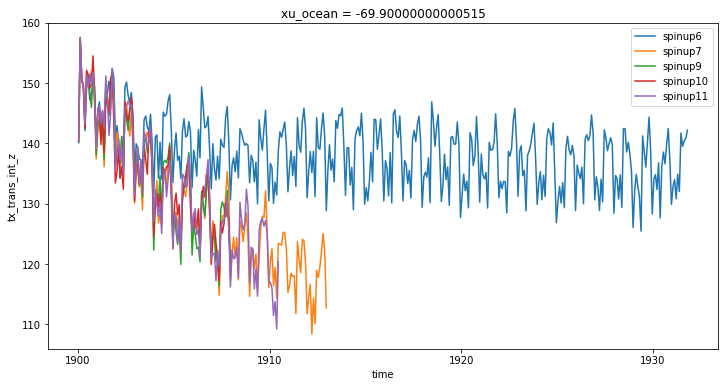

In [28]:
plt.figure(figsize=(12,6))
calc_transport(db)
plt.legend()